# Business Understanding

## Purpose of Data:

This data was originally collected as part of the 1994 US Census. According to census.gov, The purpose of the Census is for the government to better understand the demographics of the people living there and where a variety of metrics are trending. This information is used to help determine where and how to allocate federal and state funding. The raw data was then extracted and compiled by Barry Becker and is available on UCI's machine learning repository here: https://archive.ics.uci.edu/ml/datasets/adult

## Data Outcomes

There are two outcomes in mind with this dataset:

1. To use logistic regression or a random forest model to predict whether an observation makes more or less than \$50k. Repeated 10 fold cross validation will be used to obtain metrics. While classification accuracy will be the primary measure of prediction success, since this is an unbalanced dataset, precision will also be an important metric to judge success to see how well the prediction works at correctly identifying those that make greater than $50k. Since this is the smaller level of outcomes, it will be harder to predict, and in a context of trying to predict who to market something towards, could be more valuable. The goal will be to try to maximize precision while keeping accuracy above that of a naive models performance. 
1. To use multiple linear regression to predict age. Repeated 10 fold cross validation will be used to obtain metrics and judging success based off RMSE, because it will provide a clearly interpretable measure of how close the model is able to typically predict the age of an observation from just the available variables in the dataset.  

# Data Understanding

## Data Meaning and Type

The dataset contains 48,842 observations with 15 total variables, for a total of 732,630 data elements. The below list contains each attribute definition based on the UCI archive and data type determined in the code below. 

* age (integer between 17 and 90): The age of the individaul observed.
* workclass (object with 8 levels): The employment type of the individual. For example if they are self employed or government employed. 
* fnlwgt (integer between ~12,285 and ~1,490,400): The definition of this is slightly unclear, but generally seems to be the number of people the census estimates the observation represents. 
* education (object with 16 levels): Category of education completed by observation.
* educational-num (integer between 1 and 16): Numeric value of education completed by observation. 
* marital-status (object with 7 levels): Marital status of individual, including if their spouse is in the armed forces or absent.
* occupation (object with 14 levels): The type of work the indidividual does.
* relationship (object with 6 levels): Relationship individual has with others in the househould, similar to marital status but includes other categories potentially more applicable to younger observations such as ownly child or not in a family. 
* race (object with 5 levels): Race of indivdual
* sex (object with 2 levels): Sex of individual, male or female
* capital-gain (integer between 0 and 99,999): Self-reported capital gains by the indidivdual for the most recent year.
* capital-loss (integer between 0 and 4,356): Self-reported capital losses by the individual for the most recent year. 
* hours-per-week (integer between 1 and 99): Self-reported number of hours worked per week by the individual.
* native-country (object with 42 levels): Native country of the individual
* income (object with 2 levels): Self-reported income class for the individual, either greater or less than $50k.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/adult.csv') # read in the csv file

#replace question mark values as na
df = df.replace('?', np.NaN)

df.info()

# below method of finding count of unique values by column from: https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

n = df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
No.of.unique values in each column :
 age                   74
workclass    

## Data Quality

### Missing Values - Workclass and Occupation

There are missing values in 3 of the columns: workclass, occupation, and native-country. 

While a missing value in occupation could indicate unemployed, it would then be expected to better align with the count of workclass in the level of "never-worked" and/or "Without pay", however this is not the case. 

It is also seen that all 2,799 missing workclass values are also missing an occupation. This pattern might suggest that they are unemployed, however they are still reporting working hours as well as at times income > $50k. 

The most likely explanation is a data collection or data quality issue for these two fields, since everyone should have a native country and class of work. With no clear pattern to these missing values, we will drop these records rather than trying to impute and potentially bias the dataset.  

In [2]:
# count missing values in each column
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [3]:
# check count of neverworked and without pay to see if it alligns with blank occupations
df.groupby('workclass').count()

,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
workclass,,,,,,,,,,,,,,
Federal-gov,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1406,1432
Local-gov,3136,3136,3136,3136,3136,3136,3136,3136,3136,3136,3136,3136,3100,3136
Never-worked,10,10,10,10,10,0,10,10,10,10,10,10,10,10
Private,33906,33906,33906,33906,33906,33906,33906,33906,33906,33906,33906,33906,33307,33906
Self-emp-inc,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1646,1695
Self-emp-not-inc,3862,3862,3862,3862,3862,3862,3862,3862,3862,3862,3862,3862,3796,3862
State-gov,1981,1981,1981,1981,1981,1981,1981,1981,1981,1981,1981,1981,1946,1981
Without-pay,21,21,21,21,21,21,21,21,21,21,21,21,21,21


In [4]:
# see if all 2799 missing workclass are also missing occupation
np.shape(df[(df.workclass.isnull()) & (df.occupation.isnull())])

(2799, 15)

In [5]:
# remove missing occupation values
df = df[df['occupation'].notna()]

#see remaining missing values
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     811
income               0
dtype: int64

### Missing Values - Native Country

There are still 811 missing native country values in the dataset. To see if there is a pattern in these values, a Chi-Squared test with income was done, since that is our most important field for prediction. The resulting p-value was .314, providing insufficient evidence to reject the idea that the two groups (missing and not missing countries) had a different balance of income. Therefore, these values were also removed, leaving 45,222 values. 

In [6]:
testdf = df[['native-country', 'income']]

#impute native country to just true or false, where 0 is missing values
testdf["native-country"] = np.where(testdf["native-country"].isnull(), 0, 1)

<ipython-input-6-3eb386434996>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf["native-country"] = np.where(testdf["native-country"].isnull(), 0, 1)


In [7]:
#get category counts
testdf.value_counts()

native-country  income
1               <=50K     34014
                >50K      11208
0               <=50K       597
                >50K        214
dtype: int64

In [8]:
# Chi squared test, code based on: https://www.reneshbedre.com/blog/chi-square-test.html
from scipy.stats import chi2_contingency

observed = np.array([[597, 214], [34014,11208]])
chi_val, p_val, dof, expected =  chi2_contingency(observed)
chi_val, p_val, dof, expected

(1.0128313012805379,
 0.3142255010560008,
 1,
 array([[  609.7695349,   201.2304651],
        [34001.2304651, 11220.7695349]]))

In [9]:
# remove missing country values
df = df[df['native-country'].notna()]

#see remaining missing values
df.isna().sum()

np.shape(df)

(45222, 15)

### Duplicate Values

There were 47 duplicate values in the dataset. While duplicates are unlikely, they are possible that two people responded with the same information to this set of census questions. While the data may be real, it still poses a risk of biasing the dataset towards these observations, when they contain the same information. Because of this, these 47 records are also removed. 

In [10]:
bool_series = df.duplicated(keep='first')

#count duplicates
np.shape(df[bool_series])

#view duplicates
df[bool_series]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [11]:
#remove duplicates
df = df[~bool_series]

### Outliers

In checking for outliers, a preliminary visual inspection was used on the distributions of the numeric columns. Other methods considered were IQR and Z-Score based methods, however, since the numeric fields in this dataset are all heavily skewed toward a specific value (such as 40 hour work weeks or 0 capital gains), numerous realistic values are flagged by conventional measures. During the modeling effort, it could be worth investigating scaling these measures or turning them into factors, particularly with capital-gain, where the data suggests that any gains over 99,999 are all classified as a 99,999. 

c:\Users\dobbs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-gain'>

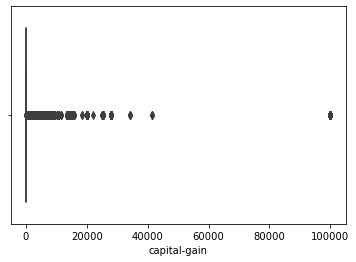

In [12]:
from scipy import stats

z = np.abs(stats.zscore(df['hours-per-week']))

np.shape(np.where(z > 4))

sns.boxplot(df['capital-gain'])

c:\Users\dobbs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

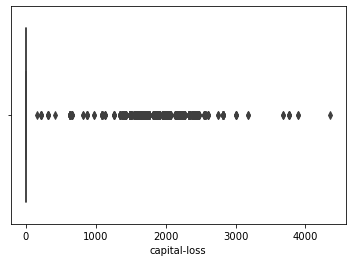

In [13]:
sns.boxplot(df['capital-loss'])

c:\Users\dobbs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

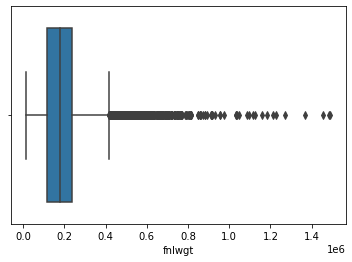

In [14]:
sns.boxplot(df['fnlwgt'])

c:\Users\dobbs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

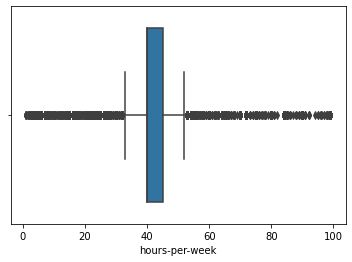

In [15]:
sns.boxplot(df['hours-per-week'])

In [16]:
df[df['capital-gain'] > 50000]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
346,39,Private,198654,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,159219,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,191547,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
702,43,State-gov,125831,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47392,22,Self-emp-not-inc,214014,Some-college,10,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,>50K
48109,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48519,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


### Summary Statistics - Numeric

Distribution statistics such as quartiles, min and max, mean, and standard deviation are useful ways to explore numeric variables at a summary level. They help provide insight into what individual variables look like, providing a better starting point of necessary transformations or places where significant interactions may be more likely. 

The below is a summary of notable findings of the numeric variables:

* Age - The summary statistics for age seem to show a fairly representative distribution of the adult working population (17 and older), however there is a slight right skew to the data with a max value of 90 but 75% of the observations being under the age of 48. This is the age we would want considering the main outcome we are interested in is income, people past retirement age, or under typical working age would not add any useful information to the data. 
* Capital Gains - Here again the statistics look to be representative of what we would expect out of the adult working population. At least 75% of the observations reported no capital gains, which makes "domain knowledge" sense. An important takeaway is the max of 99,999 suggests that there was a cutoff for the max value and that value truly represents 99,999 or greater. This will be important in later interpretations and modeling of the data, since it is not truly continuous.
* Hours per Week - This variable had a bit more surpise than the previous two important variables looked at so far. The mean and median are right around 40 hours a week, which is expected since the data is collected from the US population. 50% of the observations are also between 40 and 45, which is also very reasonable. The minimum hour of 1 seems somewhat suspicious, however it could be they are reporting nothing but now "passive" income. The higher end of the values also seem questionable. 99 hours is a high amount of hours to be working consistently per week, but could be something like capital gains where past a certain value, numbers were bucketed together. Like capital gains, this variable could benefit from being transformed into a factor/categorical variable or otherwise normalized. 

In [17]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Summary Statistics - Categorical

Proportion was used to explore the categorical variables at a summary level. This statistic is important in understanding the balance of the individual fields and where it could be useful to group certain similar categories together to help improve sample size. 

The below is a summary of notable findings of the categorical variables:

* Marital Status - The two most common values here were married civilians and those who have never been married, making up almost 80 percent of the population. Also noteworthy is that married armed forces made up an extremely small portion of the population, as expected. However it could be a potential sample size issue.
* Native Country - As expected, the US makes up a large portion of the observations. Mexico makes up just under 2%, however, after that the portions are extremely small. This suggests it may be a good idea to bucket some of these native countries together to improve sample size, if they appear similarly behaved. 
* Work Class - This variable also is quite unbalanced, with private employment making up almost 75% of the observations, so grouping may also help improve model performance.
* Occupation - The most balanced distribution seen yet, with no single occupation category making up more than 14% of the population. This balance indicates that this field may be one of the  most helpful in determining something like income, since there are less balance issues to worry about.

In [18]:
df['marital-status'].value_counts(normalize=True)

Married-civ-spouse       0.465789
Never-married            0.322457
Divorced                 0.139325
Separated                0.031234
Widowed                  0.028268
Married-spouse-absent    0.012219
Married-AF-spouse        0.000708
Name: marital-status, dtype: float64

In [19]:
df['native-country'].value_counts(normalize=True)

United-States                 0.913248
Mexico                        0.019812
Philippines                   0.006242
Germany                       0.004272
Puerto-Rico                   0.003874
Canada                        0.003608
El-Salvador                   0.003254
India                         0.003254
Cuba                          0.002944
England                       0.002634
China                         0.002501
Jamaica                       0.002280
South                         0.002236
Italy                         0.002214
Dominican-Republic            0.002147
Japan                         0.001970
Guatemala                     0.001859
Vietnam                       0.001837
Columbia                      0.001815
Poland                        0.001793
Haiti                         0.001527
Portugal                      0.001372
Iran                          0.001240
Taiwan                        0.001217
Greece                        0.001085
Nicaragua                

In [20]:
df['workclass'].value_counts(normalize=True)

Private             0.736292
Self-emp-not-inc    0.084007
Local-gov           0.068622
State-gov           0.043077
Self-emp-inc        0.036414
Federal-gov         0.031123
Without-pay         0.000465
Name: workclass, dtype: float64

In [21]:
df['occupation'].value_counts(normalize=True)

Craft-repair         0.133038
Prof-specialty       0.132839
Exec-managerial      0.132374
Adm-clerical         0.122524
Sales                0.119646
Other-service        0.106364
Machine-op-inspct    0.065634
Transport-moving     0.051267
Handlers-cleaners    0.045268
Farming-fishing      0.032651
Tech-support         0.031411
Protective-serv      0.021583
Priv-house-serv      0.005091
Armed-Forces         0.000310
Name: occupation, dtype: float64

### Visualize Attributes
#### Education
Via domain knowledge, we suspect education to be a strong predictor for income; thus, it will be the first variable we will visualize.To avoid manipulating the dataset in a manner that may affect future models, we will run all visualizations through a copy of the dataset (df_2). For the first variable, Education, we made sure it was set as categorical, then releveled the factors, such that they are outlined from least to most vis-a-vis education level for easier interpretation. The histogram shows an unbalanced distribution, such that all levels don't have the same number of instances. When modeling, it will be prudent to create more pragmatic levels (e.g., "< High school", "HS-college/trade", "Bachelor's", "Post-high school") to address this concern.

In [22]:
#Create copy of dataset in order to apply manipulations for visual inspection
df_2 = df.copy()

# convert categorical variables into numeric
# df_2['income'] = df_2['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

df_2.head()





,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


[Text(0.5, 1.0, 'Distribution of Education')]

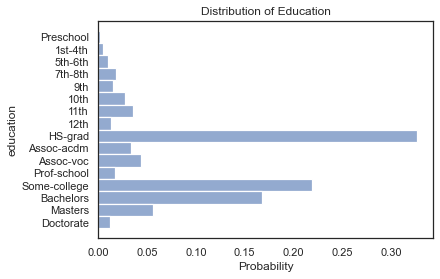

In [23]:
# Set variable as categorical, reorder factor levels form least to most education
sns.set_theme(style='white', palette='deep')

df_2["education"] = df_2["education"].astype('category')

df_2["education"] = df_2["education"].cat.as_ordered()

df_2["education"] = df_2["education"].cat.set_categories(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Assoc-acdm', 'Assoc-voc', 'Prof-school', 'Some-college', 'Bachelors', 'Masters', 'Doctorate'], ordered=True)

sns.histplot(data = df_2, y = "education", discrete = True, stat = 'probability', alpha = 0.6, legend = False).set(title="Distribution of Education")



#### Age
Since Age is continous variable, there is no need to rearrange levels of factors, like we did for Education. A visual inspection of the histogram below suggests the distribution to have a right skew. There also seems to be an abnormally high occurrence of instances of age 36, specifically 1283 of them. A transformation may be beneficial for further statistical anaylses and modeling. The attribute ranges from 17 to 90, with a mean of 38.6. The boxplot allows a different perspective by which we can see the right-skew and the presence of outliers outside of the inter-quartile range (IQR).

Highest Ocurrence: [(36, 1283)]


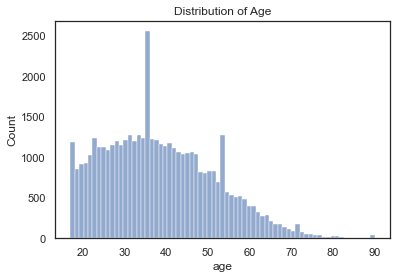

In [24]:
# Histogram
sns.histplot(data = df_2, x = "age", alpha = 0.6).set(title="Distribution of Age")

# Find instance with highest occurences, code based on: https://www.codegrepper.com/code-examples/python/python+element+with+max+count
from collections import Counter

c = Counter(df_2["age"])

print("Highest Ocurrence:", c.most_common(1))


Mean: 38.55617044825678
Min: 17
Max: 90


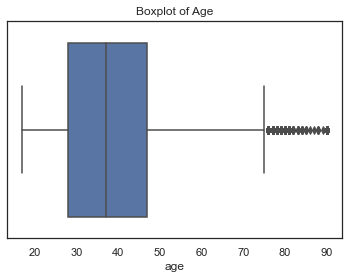

In [25]:
# Boxplot
sns.boxplot(data = df_2, x="age"). set(title="Boxplot of Age")

print("Mean:", df_2["age"].mean())
print("Min:", df_2["age"].min())
print("Max:", df_2["age"].max())

#### Race
The variable, Race, adds a social component to this analysis and particularly for data from the US, a degree of complexity that can lead to higher precision and clarity. Like other categorical variables, we set it as such and ran a histogram with respect to probability rather than count, as in this case, it allows for easier interpretation of the data. Although we are not to expect a normal distribution from the levels of this variable--given that a random sample taken from the US population would not reflect this pattern--it is worth noting that the "White" factor is over-represented in this set per current U.S. Census Bureau data (76.3% actual vs. 86% set); this, naturally, would imply an under-representation of one or more of the other factors--namely, "Black"(13.4% actual vs. 9.4% set) and "Asian-Pac-Islander" (6.1% actual vs. 2.9% set).

Percentages by Race:
 White                 86.018816
Black                  9.356945
Asian-Pac-Islander     2.879911
Amer-Indian-Eskimo     0.962922
Other                  0.781406
Name: race, dtype: float64


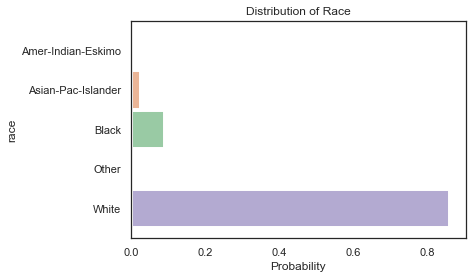

In [26]:
# set variable as category
df_2["race"] = df_2["race"].astype('category')

# Histogram
sns.histplot(data = df_2, y = 'race', discrete = True, stat = 'probability', alpha = 0.6, hue = "race", legend = False). set(title="Distribution of Race")

# Outline percentages by Race, code based on: https://stackoverflow.com/questions/53690279/pandas-percentage-count-of-categorical-variable
print("Percentages by Race:\n", (df_2["race"].value_counts() / len(df_2["race"]))*100)

#### Gender
Similar to the variable above, Gender adds an insightful social dimension, whose analysis must be duly contextualized within the history of the US's social dynamics with respect to this variable and the nuances pertaining thereunto. Unlike the previous variable, however, there should be relatively equal distribution between the factors. In this dataset there is a considerable difference between "Male" and "Female" (67.5% M vs. 32.5% F); whereas, the current US Census Bureau data reflects a nearly equal distribution (49.2% M vs. 50.8% F). This disparity must be taken into consideration when making inferences or applying models to the general population outside of this dataset. Nothing in particular was done to this variable other than defining it as a category before plotting with respect to percentage of dataset.

Percentages by Gender:
 Male      67.504151
Female    32.495849
Name: gender, dtype: float64


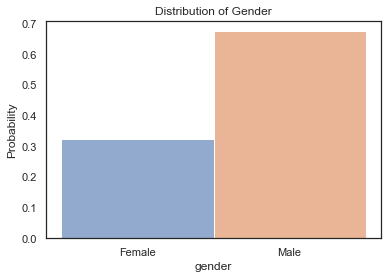

In [27]:
# set variable as category
df_2["gender"] = df_2["gender"].astype('category')

# Histogram
sns.histplot(data = df_2, x = 'gender', discrete = True, stat = 'probability', alpha = 0.6, hue = "gender", legend = False).set(title="Distribution of Gender")

# Outline percentages by Gender, code based on: https://stackoverflow.com/questions/53690279/pandas-percentage-count-of-categorical-variable
print("Percentages by Gender:\n", (df_2["gender"].value_counts() / len(df_2["gender"]))*100)

#### Income
Income is the response variable, so it is essential to be aware of the distribution found therein. In this case, we have a significantly unbalanced dataset with respect to income--this, unfortunately, may compromise the accuracy and utility of models derived from this dataset. There are methods to balance the data, however, that may be used prior to modeling, if found prudent to do so. Although this distribution may reflect the reality of income distribution in the US in 1994, a balanced distribution allows us to lower the No Information Rate, which makes the evaluative metrics of a model more valuable for prediction and classification purposes. We are treating this variable as discrete, despite Income being numeric in nature; thus, we defined it as such prior to plotting.

Percentages by Income:
 <=50K    75.203099
>50K     24.796901
Name: income, dtype: float64


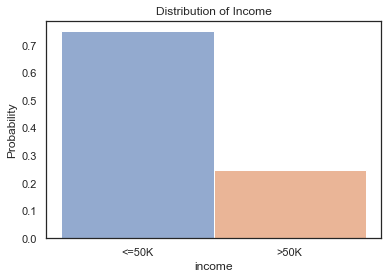

In [28]:
df_2["income"] = df_2["income"].astype('category')

df_2["income"] = df_2["income"].cat.as_ordered()

sns.histplot(data = df_2, x = 'income', discrete = True, stat = 'probability', alpha = 0.6, hue = 'income', legend = False).set(title="Distribution of Income")

# Outline percentages by income, code based on: https://stackoverflow.com/questions/53690279/pandas-percentage-count-of-categorical-variable
print("Percentages by Income:\n", (df_2["income"].value_counts() / len(df_2["income"]))*100)

### Explore Joint Attributes

### Explore Attributes and Class

### New Features